# Decision Tree Project Tutorial

**Objetivo de la tarea:**

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene diabetes o no.

## STEP 1: Cargar los datos y guardardarlos

Como es habitual, primero ejecutar en consola `pip install -r requirements.txt`

In [1]:
# igualmente debo ejecutar esto
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 103.4 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 85.3 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 87.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 73.9 MB/s eta 0:00:000m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 38.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 35.6 MB/

In [2]:
# importamos librerías
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import pickle

In [3]:
# cargamos datos
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


El dataset contiene 9 variables y 768 observaciones. No hay datos faltantes, los tipos de variables están bien identificados salvo para la variable target (Outcome) que debe ser categórica. Se cambia esa clase y se guarda el dataset inicial. 

### Diccionario:

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Outcome:** Class variable (0 or 1), Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

In [5]:
# se cambia a categórico
df_raw.Outcome = pd.Categorical(df_raw.Outcome)
# se guardan datos iniciales
df_raw.to_csv('../data/raw/datos_iniciales.csv', index = False)

## STEP 2: Análisis exploratorio y guardado de datos procesados

In [6]:
# miro distribución de variable target, para saber si está balanceada o no
df_raw['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

No está balanceada pero tampoco es tan extremo el desbalance.

In [7]:
# separo en X e y
X = df_raw.iloc[:, :8]
y = df_raw.iloc[:, 8]

In [8]:
# miro X
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
# miro y
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: category
Categories (2, int64): [0, 1]

In [10]:
# separo en muestras de entrenamiento y evaluación, dejo la proporción de test por defecto (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3007)

In [11]:
# defino datset a realizar análisis exploratorio
df_train = pd.concat([X_train, y_train], axis = 1)
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
194,8,85,55,20,0,24.4,0.136,42,0
500,2,117,90,19,71,25.2,0.313,21,0
665,1,112,80,45,132,34.8,0.217,24,0
509,8,120,78,0,0,25.0,0.409,64,0
58,0,146,82,0,0,40.5,1.781,44,0
...,...,...,...,...,...,...,...,...,...
588,3,176,86,27,156,33.3,1.154,52,1
333,12,106,80,0,0,23.6,0.137,44,0
667,10,111,70,27,0,27.5,0.141,40,1
584,8,124,76,24,600,28.7,0.687,52,1


Ahora realizo análisis exploratorio sobre este data frame

In [12]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.814236,121.668403,69.892361,20.991319,84.631944,32.188194,0.489017,33.230903
std,3.364036,32.274412,17.937346,15.933064,119.563743,7.860948,0.353173,11.627126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.244750,24.000000
50%,3.000000,118.000000,72.000000,23.000000,44.000000,32.400000,0.392000,29.000000
75%,6.000000,142.000000,80.000000,33.000000,130.000000,36.800000,0.655000,41.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Valores aparentemente anómalos:
* glucosa = 0,
* presión sanguínea = 0
* índice de masa corporal = 0
* ''Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history.'' Si es una probabilidad expresada entre 0 y 1, los valores > 1 son anómalos


In [13]:
# me fijo cuantos casos tienen datos anómalos
anom = (df_train.Glucose == 0) | (df_train.BloodPressure == 0) | (df_train.BMI == 0)
df_train[anom]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
643,4,90,0,0,0,28.0,0.610,31,0
484,0,145,0,0,0,44.2,0.630,31,1
261,3,141,0,0,0,30.0,0.761,27,1
371,0,118,64,23,89,0.0,1.731,21,0
468,8,120,0,0,0,30.0,0.183,38,1
494,3,80,0,0,0,0.0,0.174,22,0
349,5,0,80,32,0,41.0,0.346,37,1
222,7,119,0,0,0,25.2,0.209,37,0
435,0,141,0,0,0,42.4,0.205,29,1
533,6,91,0,0,0,29.8,0.501,31,0


In [14]:
print(f'Hay {sum(anom)} observaciones con valores anómalos en {len(df_train)} observaciones ({round(100*sum(anom)/len(df_train))}%)')

Hay 28 observaciones con valores anómalos en 576 observaciones (5%)


Son pocos casos, se eliminan:

In [15]:
df_train = df_train[anom == False]

In [16]:
df_train.shape

(548, 9)

Se trabaja de ahora en más con 548 observaciones

In [17]:
# vuelvo a definir X_train y y_train para eliminar esos anómalos
X_train = df_train.iloc[:, :8]
y_train = df_train.iloc[:, 8]

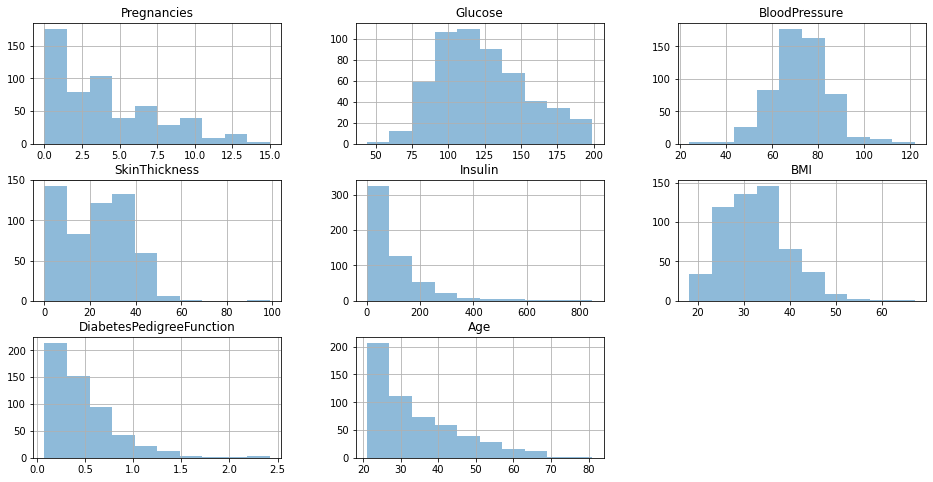

In [18]:
# histogramas univariados
X_train.hist(figsize = (16, 8), alpha = 0.5)
plt.show()

* Glucosa, presión sanguínea e índicde de masa corporal tienen una distribución de campana similar a la normal.
* las demás variables tienen una distribución sesgada a la izquierda

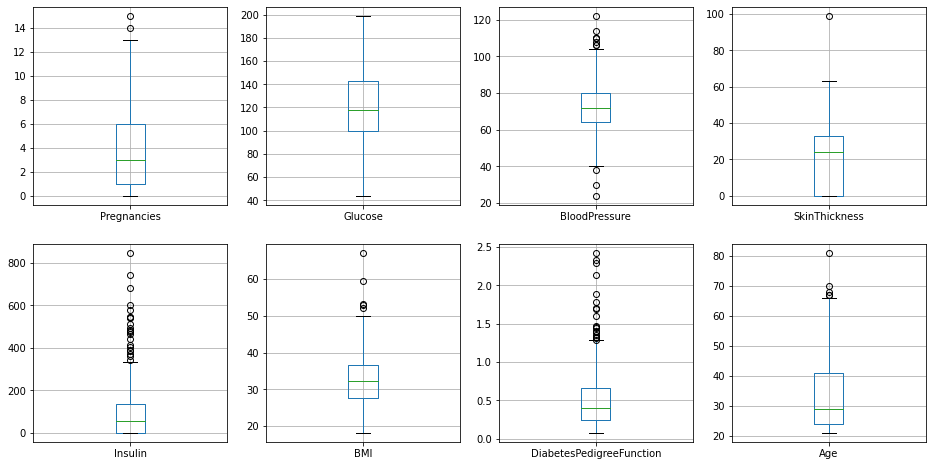

In [19]:
# diagramas de caja
fig, ax = plt.subplots(2,4, figsize=(16,8))
axs= ax.flatten()
for i in range(len(axs)):
  X_train._get_numeric_data().iloc[:,i].to_frame().boxplot(ax=axs[i])

Los boxplot indican posible presencia de otros valors anómalos, por ejemplo un caso con grosor de la piel de 10 cm (habría que mirar si tiene un valor muy alto en BMI)

Es necesario depurar al máximo la base porque los árboles de decisión se ven afectados por valores atípicos.

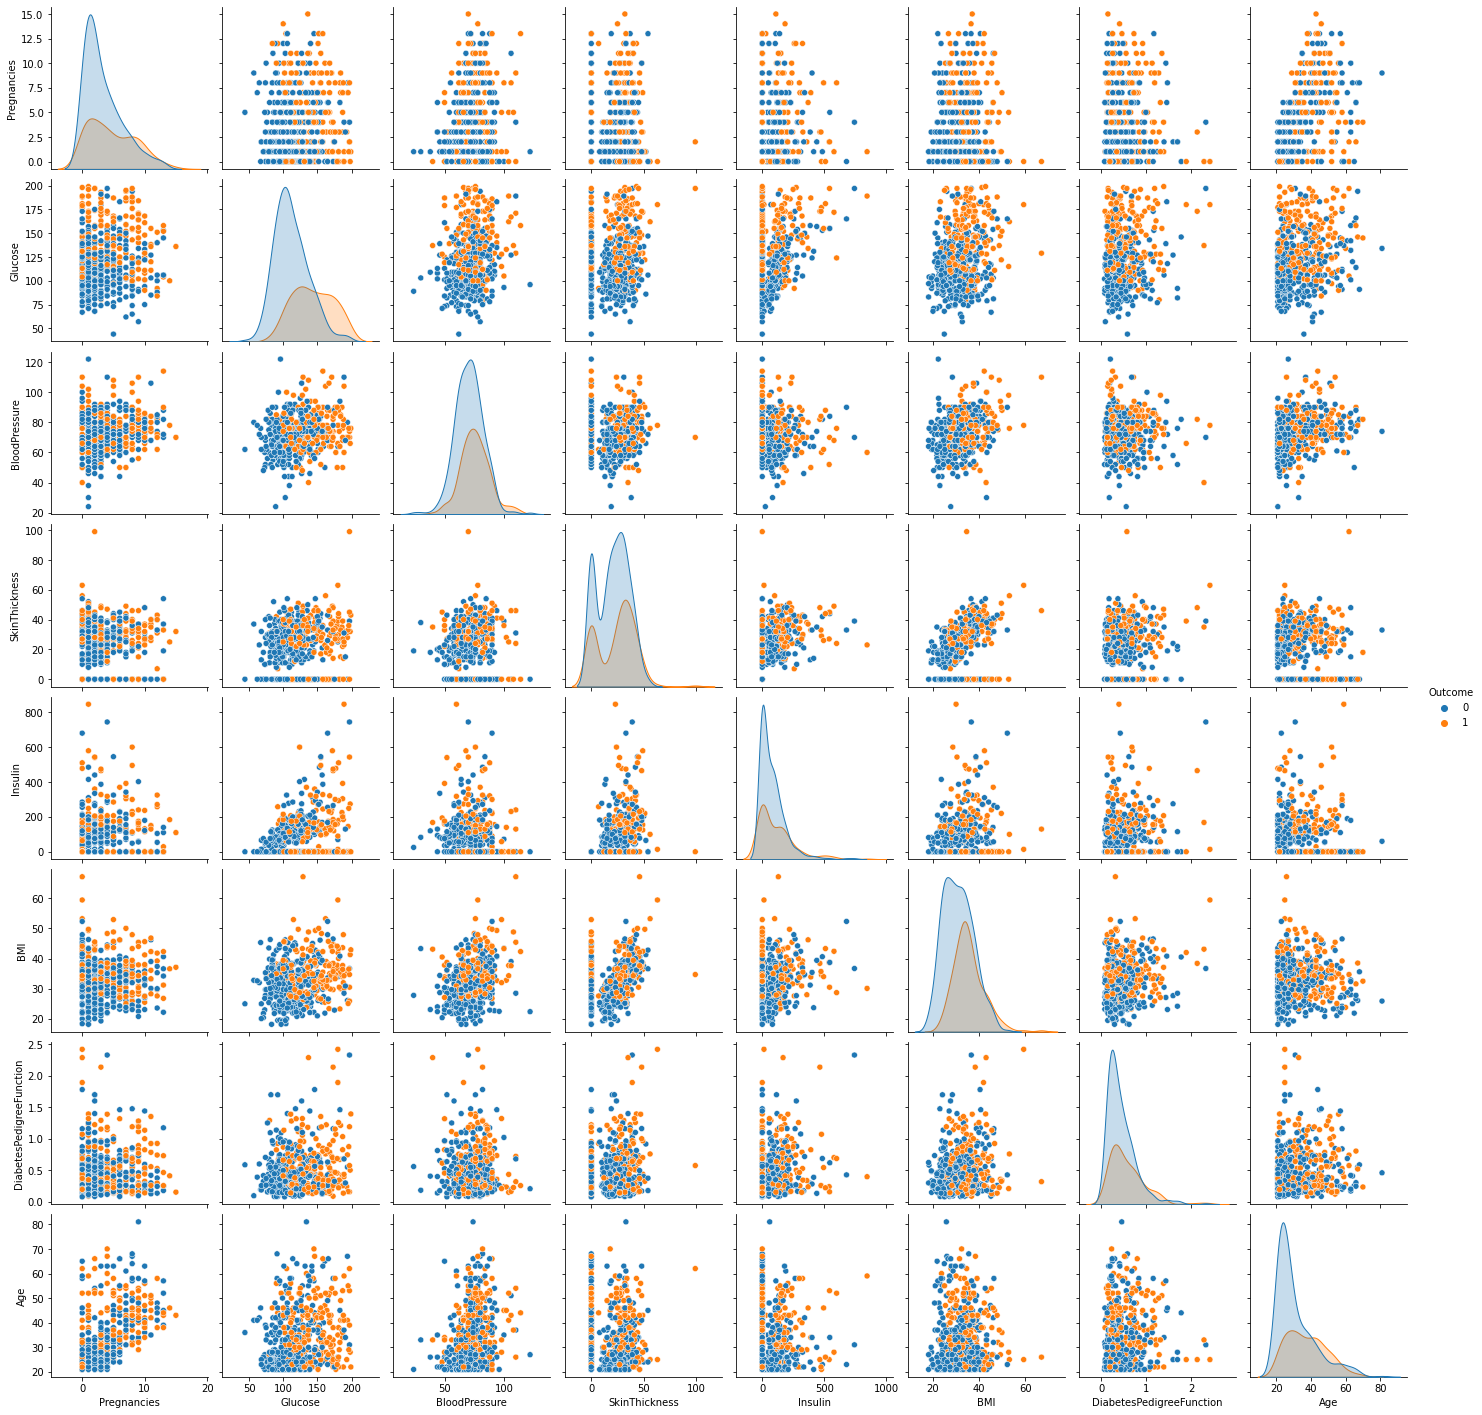

In [20]:
# gráficos bivariados identificando si tiene o no diabetes
sns.pairplot(data = df_train, hue = 'Outcome')
plt.show()

En todas las distribuciones individuales se aprecian diferencias importantes según si la persona padece o no diabetes, esto indica que podrían llegar a ser buenas predictoras.

Se aprecia cierta relación entre la glucosa y la insulina (correlación positiva, la glucosa siempre superior a la insulina). Debe haber una explicación biológica que desconozco, solamente me limito a describir el gráfico

También se observa correlación positiva entre el grosor del pliegue de la piel y el índice de masa corporal, lo cual es coherente.

También se observa relación entre la cantidad de embarazos y la edad


In [21]:
# matriz de correlaciones
df_train.corr().style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.082514,0.194534,-0.063406,-0.071574,0.017590,-0.014162,0.568677
Glucose,0.082514,1.000000,0.224808,0.094015,0.337977,0.233516,0.158850,0.234086
BloodPressure,0.194534,0.224808,1.000000,0.032593,-0.061056,0.304481,0.010074,0.306059
SkinThickness,-0.063406,0.094015,0.032593,1.000000,0.418035,0.382668,0.168052,-0.098779
Insulin,-0.071574,0.337977,-0.061056,0.418035,1.000000,0.179868,0.167239,-0.039435
BMI,0.017590,0.233516,0.304481,0.382668,0.179868,1.000000,0.159560,0.020121
DiabetesPedigreeFunction,-0.014162,0.158850,0.010074,0.168052,0.167239,0.159560,1.000000,0.045692
Age,0.568677,0.234086,0.306059,-0.098779,-0.039435,0.020121,0.045692,1.000000


No se observan correlaciones muy altas entre las variables explicativas

In [22]:
# guardo datos procesados
df_train.to_csv('../data/processed/datos_entrenamiento_procesados.csv', index = False)

## STEP 3: Se crea primer modelo usando árboles de decisión

In [23]:
# estimo árbol de decisión con parámetros por defecto
clf = DecisionTreeClassifier(random_state = 3007)
clf.fit(X_train, y_train)
# evalúo con datos de control (test)
clf.score(X_test, y_test)

0.7239583333333334

Con el modelo inicial se clasifica bien al 73% de los casos

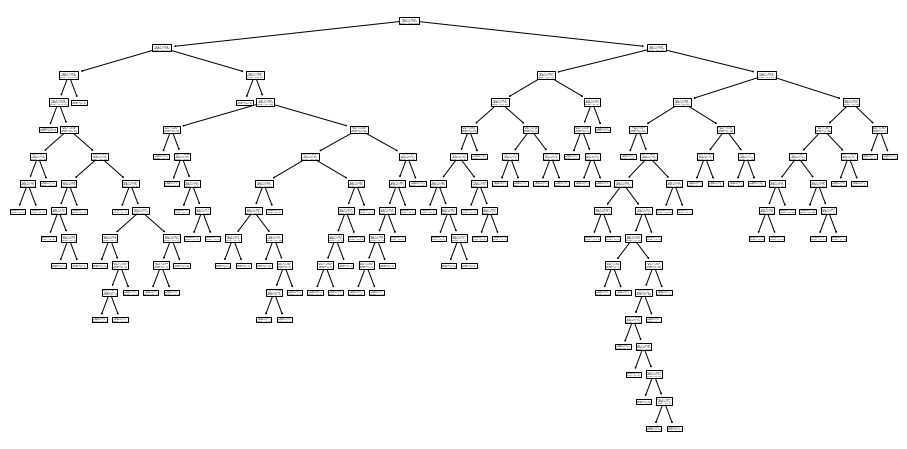

In [24]:
# miro él árbol creado
plt.figure(figsize = (16, 8))
tree.plot_tree(clf)
plt.show()

En la imagen no se logra ver las reglas de decisión utilizadas, pero se puede ver que es un árbol con muchas ramas, profundidad y nodos finales (hojas). Es el árbol maximal (cuando no se especifican criterios de corte).

In [25]:
# miro la importancia de las variables
df_var_imp = pd.DataFrame({'variable':clf.feature_names_in_, 'importance': clf.feature_importances_}).sort_values(by = 'importance', ascending = False)
df_var_imp

,variable,importance
1,Glucose,0.274698
5,BMI,0.184619
6,DiabetesPedigreeFunction,0.129878
7,Age,0.112110
3,SkinThickness,0.091655
2,BloodPressure,0.083763
0,Pregnancies,0.064177
4,Insulin,0.059101


De acuerdo a este árbol, la variable más importante para predecir la diabetes es el nivel de glucosa, le sigue el índice de masa corporal. Las variables menos importantes son la cantidad de embarazos y el nivel de insulina en sangre.

## STEP 4: Crear un nuevo árbol utilizando el criterio de entropía

In [26]:
# estimo árbol de decisión con criterio de entropía
clf2 = DecisionTreeClassifier(random_state = 3007, criterion = 'entropy')
clf2.fit(X_train, y_train)
# evalúo con datos de control (test)
clf2.score(X_test, y_test)

0.6979166666666666

Con este segundo árbol se obtiene un score del 69.8%, un poco inferior al anterior

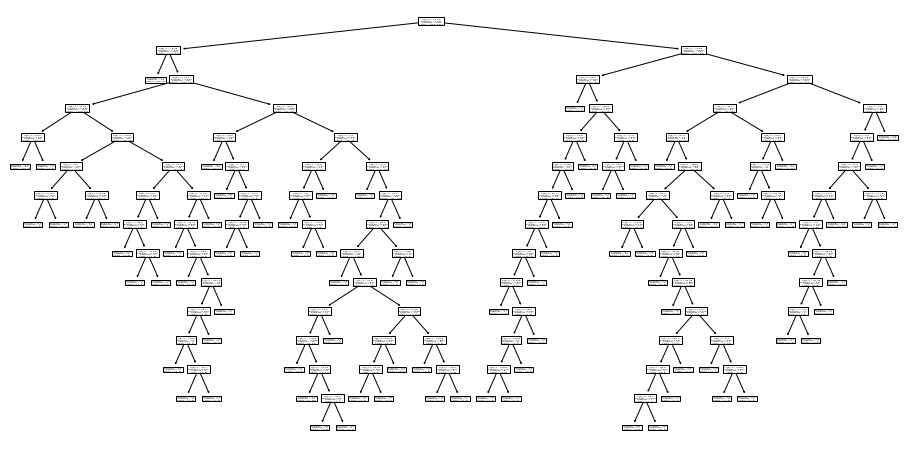

In [27]:
# miro él árbol creado
plt.figure(figsize = (16, 8))
tree.plot_tree(clf2)
plt.show()

Este árbol se ve todavía más frondoso que el anterior, utiliza más reglas de decisión para obtener un peor ajuste.

In [28]:
# miro la importancia de las variables
df_var_imp2= pd.DataFrame({'variable':clf2.feature_names_in_, 'importance': clf2.feature_importances_}).sort_values(by = 'importance', ascending = False)
df_var_imp2

,variable,importance
1,Glucose,0.238219
5,BMI,0.225416
6,DiabetesPedigreeFunction,0.152221
7,Age,0.105956
3,SkinThickness,0.078939
0,Pregnancies,0.071809
2,BloodPressure,0.071446
4,Insulin,0.055995


El orden de importancia se mantiene casi igual al anterior, salvo las variables Pregnancies y BloodPressure que se intercambian entre sí

## STEP 5: Optimizar hiperparámetros mediante Grid Search, guardar modelo final

In [29]:
# defino grilla de hiperparámetros a utilizar
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5]}

#
grid = GridSearchCV(DecisionTreeClassifier(random_state = 3007), param_grid, verbose = 2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1

GridSearchCV(estimator=DecisionTreeClassifier(random_state=3007),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]},
             verbose=2)

In [30]:
# mejor combinación de hiperparámetros
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

La mejor combinación encontrada utiliza el criterio de Gini, con una profundidad máxima igual a 5, la cantidad mínima de observaciones por hoja igual a 1 y la cantidad mínima de observaciones para dividir un nodo igual a 2

In [31]:
# mejor modelo
clf_best = grid.best_estimator_

In [34]:
# predicciones y reporte de performance
y_pred = clf_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       130
           1       0.74      0.52      0.61        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.78      0.79      0.77       192



Al optimizar los hiperparámetros se obtiene una mejora en el accuracy score respecto a los dos árboles estimados previamente (79% versus 72% y 69%).

El modelo tiene mejores resultados al predecir la categoría 0 (no diabetes), que a su vez es la categoría dominante. 

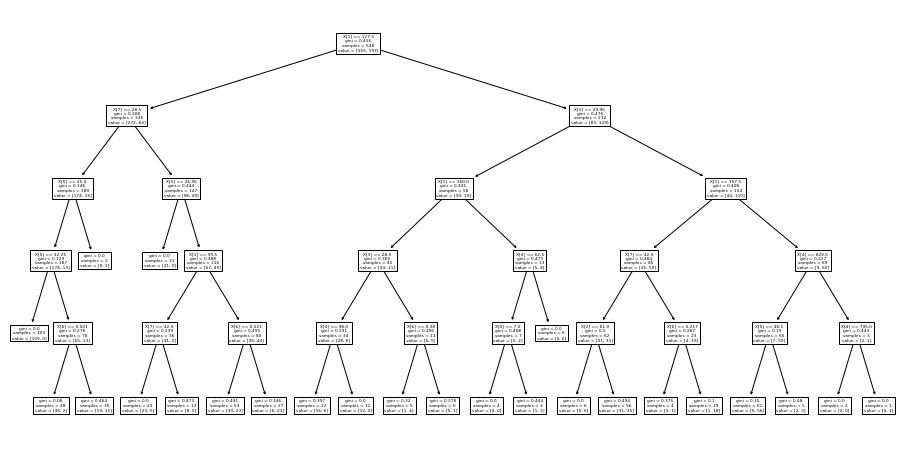

In [35]:
# miro él árbol final
plt.figure(figsize = (16, 8))
tree.plot_tree(clf_best)
plt.show()

In [36]:
# miro la importancia de las variables
df_var_imp_best= pd.DataFrame({'variable':clf_best.feature_names_in_, 'importance': clf_best.feature_importances_}).sort_values(by = 'importance', ascending = False)
df_var_imp_best

,variable,importance
1,Glucose,0.464622
5,BMI,0.209357
7,Age,0.123842
6,DiabetesPedigreeFunction,0.100390
4,Insulin,0.056304
2,BloodPressure,0.024643
0,Pregnancies,0.011306
3,SkinThickness,0.009536


En este caso se aprecian algunos cambios en el orden de importancia de las variables: si bien glucosa y BMI siguen siendo las dos más importantes, suben en importancia Age (1 lugar) e Insulin (3 lugares), mientras que DiabetesPedigreeFunction y SkinThickness bajan en importancia (1 y 3 lugares respectivamente).

In [33]:
# se guarda modelo final
filename = '../models/decTree_model.sav'
pickle.dump(clf_best, open(filename,'wb'))